# 8일차 과제 : KNN 최근접이웃

 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 최적의 이웃 수를 산출하라. 
 
 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
 
 -.목표변수(diagnosis, 0: Malignant(악성,212개), 1: Benign(양성,357개)

In [13]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [11]:
ds_bc = pd.read_csv('/home/pirl/Downloads/week4day1/유방암.csv',engine='python')
ds_bc.info()
#설명변수 X_i는 30개
#종속변수 Y는 이산형(1은 양성, 0은 악성)이지만 실제 분석에서는 연속형으로 처리
#결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

In [43]:
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])):
        df = df[(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) < (3.6*df.iloc[:,i].std()))]
    return df
#3.6sigma를 벗어나는 data제거 함수
#k의 개수에 따라 이상치 영향이 다르나 현재 k에 대한 정보를 모름
#494개로 이상치 제거
#data의 분포가 전반적으로 UCL을 초과하는 경향이 강하고
#모델의 일반성, 범용성을 위해 이상치 제거 실시
#이상치 미제거했을 때 보다 더 좋은 모델 결과가 나옴
ds_bc_z=remove_outlier_std(ds_bc)
ds_bc_z.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 1 to 568
Data columns (total 31 columns):
diagnosis                  494 non-null int64
mean radius                494 non-null float64
mean texture               494 non-null float64
mean perimeter             494 non-null float64
mean area                  494 non-null float64
mean smoothness            494 non-null float64
mean compactness           494 non-null float64
mean concavity             494 non-null float64
mean concave points        494 non-null float64
mean symmetry              494 non-null float64
mean fractal dimension     494 non-null float64
radius error               494 non-null float64
texture error              494 non-null float64
perimeter error            494 non-null float64
area error                 494 non-null float64
smoothness error           494 non-null float64
compactness error          494 non-null float64
concavity error            494 non-null float64
concave points error       494 no

# 데이터 분할 7 : 3

In [38]:
ds_bc_y = ds_bc_z["diagnosis"]
ds_bc_x = ds_bc_z.drop("diagnosis", axis = 1, inplace=False)

train_x, test_x, train_y, test_y =\
train_test_split(ds_bc_x, ds_bc_y,test_size=0.3, random_state = 1234)

print("train data X size: {}".format(train_x.shape))
print("train data Y size: {}".format(train_y.shape))
print("test data X size: {}".format(test_x.shape))
print("test data Y size: {}".format(test_y.shape))

train data X size: (345, 30)
train data Y size: (345,)
test data X size: (149, 30)
test data Y size: (149,)


In [39]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
knn_uncustomized.fit(train_x,train_y)
y_pred=knn_uncustomized.predict(test_x)
print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(test_y.tolist()[:10]))
print("accuracy:{0:.3f}".format(knn_uncustomized.score(test_x,test_y)))

predict test set:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
test set label:[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
accuracy:0.933


# KNN 디폴트 test 정확도: 0.936

# k=#neighbors 3~30 변화에 따른 정확도 변화

In [41]:
max_n_neighbors=28
para_n_neighbors=[i+3 for i in range(max_n_neighbors)]
train_accuracy=[]
test_accuracy=[]

for n_neighbors in para_n_neighbors:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_x, train_y)
    train_accuracy.append(clf.score(train_x,train_y))
    test_accuracy.append(clf.score(test_x,test_y))
    
ds_neighbors=pd.DataFrame()
ds_neighbors["Neighbors"]=para_n_neighbors
ds_neighbors["TrainAccuracy"]=train_accuracy
ds_neighbors["TestAccuracy"]=test_accuracy
ds_neighbors

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.971014,0.919463
1,4,0.947826,0.919463
2,5,0.942029,0.932886
3,6,0.936232,0.946309
4,7,0.936232,0.932886
5,8,0.944928,0.953020
6,9,0.944928,0.953020
7,10,0.939130,0.959732
8,11,0.939130,0.966443
9,12,0.936232,0.959732


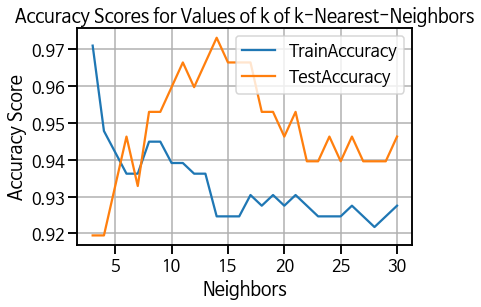

In [34]:
ds_neighbors.set_index("Neighbors", inplace=False).plot()
plt.grid()
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.ylabel('Accuracy Score')
plt.show()

# 대체로 k:이웃 수가 14까지는 test 정확도가 증가
# 그 이후에는 정확도가 떨어지는 경향
# k=14정도에서 test 정확도가 제일 높음
# k=14로 그렇게 낮지 않아서 일반성을 어느 정도 보유

# --------------------------------------------------------
#  최적 모델의 score를 확인하는 함수

In [35]:
def score(classifier, X_train, y_train, X_test, y_test, train = True):
    labels = sorted(y_train.unique())
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Training Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
        res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
        print("Training Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n")
        cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = labels),
                          columns=labels, index=labels)
        sns.set_context('talk')
        ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True, cmap='Blues')
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels[::-1])
        ax.set_ylabel('Prediction')
        ax.set_xlabel('Ground Truth')

##############################Training##############################
Training result:

Training Accuracy Score: 0.9246

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       238
           1       0.92      0.83      0.87       107

   micro avg       0.92      0.92      0.92       345
   macro avg       0.92      0.90      0.91       345
weighted avg       0.92      0.92      0.92       345


Confusion Matrix:
[[230   8]
 [ 18  89]]

Training Average Accuracy:	0.9247

Standard Deviation:	0.0228
################################Test################################
Test result:

Accuracy Score: 0.9732

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       1.00      0.92      0.96        50

   micro avg       0.97      0.97      0.97       149
   macro avg       0.98      0.96      0.97       149
weighted avg       0.97

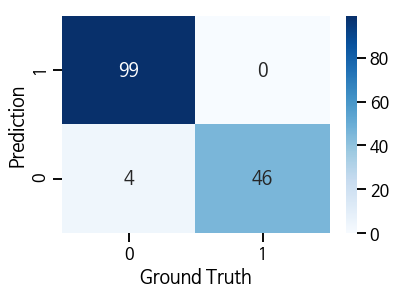

In [42]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(train_x, train_y)
print("##############################Training##############################")
score(knn ,train_x,train_y,test_x,test_y, train = True)
print("################################Test################################")
score(knn ,train_x,train_y,test_x,test_y, train = False)

# 최적의 이웃 수 k=14을 기준으로 모델을 만듦
# test 정확도는 0.9732
# confusion matrix에서는 4개의 데이터가 틀림
# 그러나 너무 높은 정확도라 과적합 가능성이 높음